In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
dataset_path = '/kaggle/input/fer2013/fer2013.csv'  # Update with actual path
data = pd.read_csv(dataset_path)
data

# Preprocess the data
def preprocess_data(data):
    # Extract features and labels
    X = np.array([np.fromstring(row, sep=' ').reshape(48, 48, 1) for row in data['pixels']])
    X = X / 255.0  # Normalize pixel values to [0, 1]
    y = to_categorical(data['emotion'], num_classes=7)  # One-hot encode labels
    return X, y

In [3]:
# Split the data based on the 'Usage' column
train_data = data[data['Usage'] == 'Training']
val_data = data[data['Usage'] == 'PublicTest']
test_data = data[data['Usage'] == 'PrivateTest']

X_train, y_train = preprocess_data(train_data)
X_val, y_val = preprocess_data(val_data)
X_test, y_test = preprocess_data(test_data)

In [5]:
# Define the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax'),
])

In [6]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=30,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/30


I0000 00:00:1733130510.986155     149 service.cc:145] XLA service 0x7e9ab8001590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733130510.986218     149 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 22/449 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2073 - loss: 1.8912

I0000 00:00:1733130517.398290     149 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


449/449 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.2559 - loss: 1.8036 - val_accuracy: 0.4124 - val_loss: 1.5229
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4193 - loss: 1.4933 - val_accuracy: 0.4948 - val_loss: 1.3062
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4956 - loss: 1.3205 - val_accuracy: 0.5361 - val_loss: 1.2172
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5348 - loss: 1.2233 - val_accuracy: 0.5325 - val_loss: 1.2002
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5624 - loss: 1.1565 - val_accuracy: 0.5567 - val_loss: 1.1523
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5756 - loss: 1.1161 - val_accuracy: 0.5801 - val_loss: 1.1177
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5908 - loss: 1.0770 - val_accuracy: 0.5938 - val_loss: 1.1027
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6078 - loss: 1.0385 - val_accuracy: 0.5901 - va

In [7]:
# Save the model
model.save("emotion_recognition_model.h5")
print("Model saved to emotion_recognition_model.h5")

Model saved to emotion_recognition_model.h5


In [8]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6335 - loss: 1.1297
Test Accuracy: 63.08%


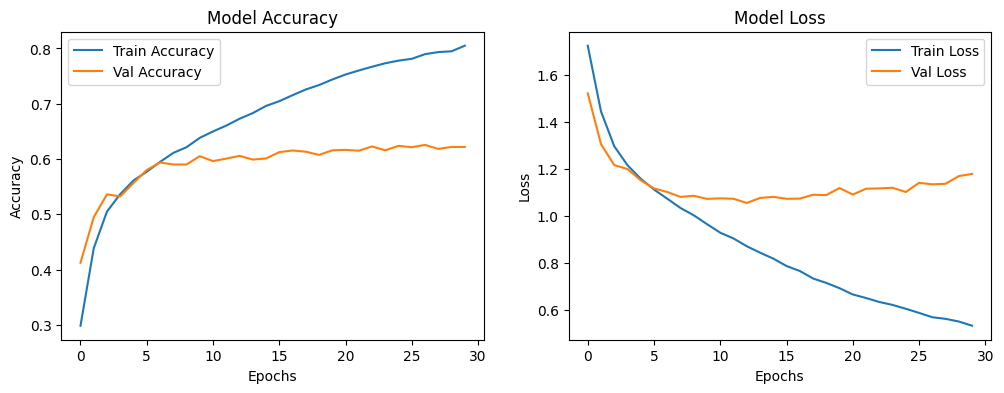

In [9]:
# Plot the training history
def plot_metrics(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    # Accuracy
    ax[0].plot(history.history["accuracy"], label="Train Accuracy")
    ax[0].plot(history.history["val_accuracy"], label="Val Accuracy")
    ax[0].set_title("Model Accuracy")
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[0].legend()
    # Loss
    ax[1].plot(history.history["loss"], label="Train Loss")
    ax[1].plot(history.history["val_loss"], label="Val Loss")
    ax[1].set_title("Model Loss")
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    ax[1].legend()
    plt.show()

plot_metrics(history)

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


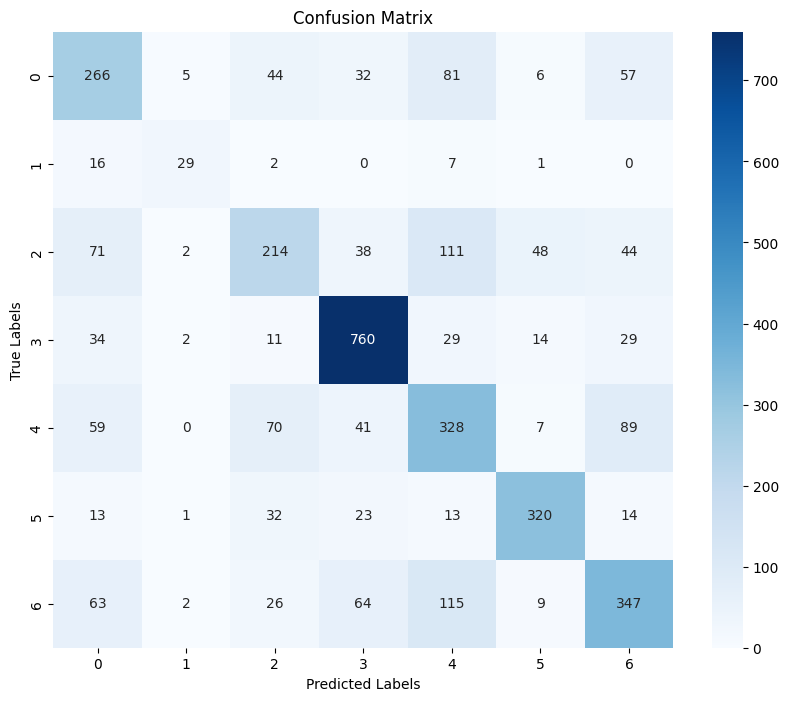

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Predict the classes on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # True labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(7), yticklabels=range(7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [11]:
# Print the classification report
class_report = classification_report(y_true, y_pred_classes, target_names=[
    "Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"
])
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

       Angry       0.51      0.54      0.53       491
     Disgust       0.71      0.53      0.60        55
        Fear       0.54      0.41      0.46       528
       Happy       0.79      0.86      0.83       879
     Neutral       0.48      0.55      0.51       594
         Sad       0.79      0.77      0.78       416
    Surprise       0.60      0.55      0.58       626

    accuracy                           0.63      3589
   macro avg       0.63      0.60      0.61      3589
weighted avg       0.63      0.63      0.63      3589



In [12]:
# Calculate and print the overall accuracy score
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy Score: {accuracy * 100:.2f}%")

Accuracy Score: 63.08%
